# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = ("C://Users/Owner/data/Mouse_metadata.csv")
study_results_path = ("C://Users/Owner/data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
all_data = pd.merge(study_results, mouse_metadata, how="left", on ="Mouse ID")

# Display the data table for preview
all_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
mice_data = all_data["Mouse ID"].unique()
number_of_mice = len(mice_data)
print(number_of_mice)


249


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = all_data[all_data[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_duplicate_id = mice_duplicate["Mouse ID"].unique()
print(mice_duplicate_id)


['g989']


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_data = all_data.loc[all_data["Mouse ID"] == mice_duplicate_id[0]]
print(mice_duplicate_data)


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_all_data= all_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
print(clean_all_data.head())


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_all_data["Mouse ID"].value_counts()
clean_number_of_mice = len(clean_mice_data)
print(clean_number_of_mice)


249


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_reg_data = clean_all_data.set_index(["Drug Regimen"])
group_drug_data = drug_reg_data.groupby("Drug Regimen")
drug_reg_mean = clean_all_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_reg_median = clean_all_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_reg_var = clean_all_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_reg_std = clean_all_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_reg_sem = clean_all_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary DataFrame.
drug_reg_sum_df  = pd.DataFrame({"Mean Tumor Volume":  drug_reg_mean,
                                 "Median Tumor Volume":  drug_reg_median,
                                 "Tumor Volume Variance":  drug_reg_var,
                                 "Tumor Volume Std. Dev.":  drug_reg_std,
                                 "Tumor Volume Std. Err.":  drug_reg_sem})
print(drug_reg_sum_df)
      


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_reg_sum_df = drug_reg_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
print(agg_drug_reg_sum_df)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64


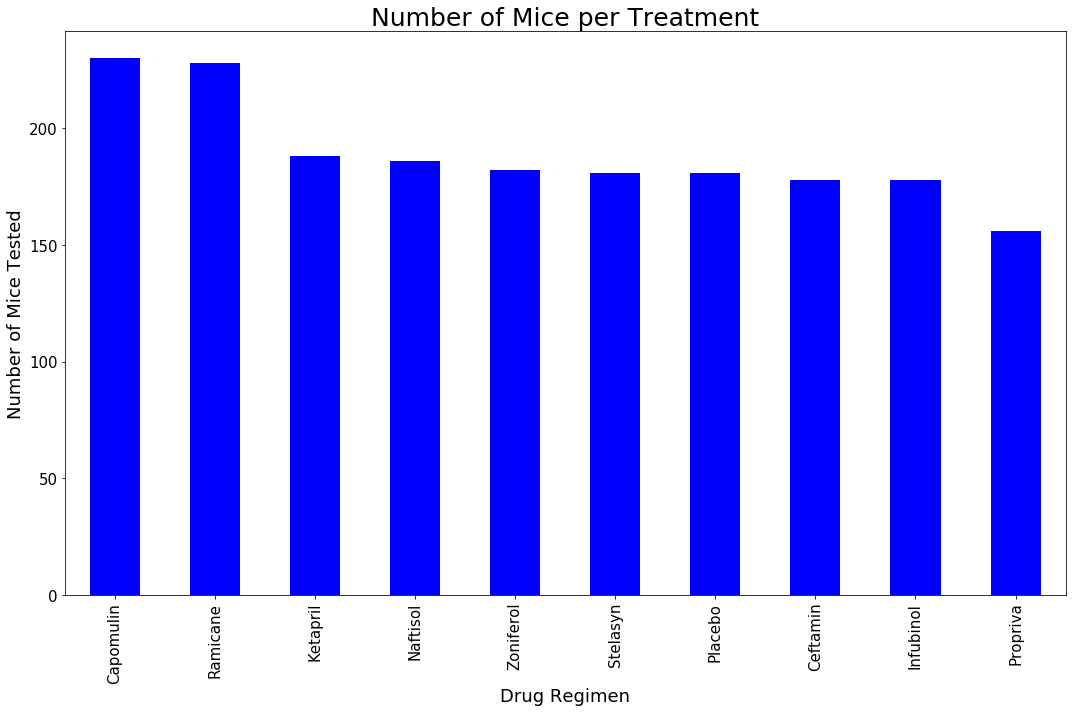

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drugs = clean_all_data[["Drug Regimen","Timepoint"]]
mice_per_drug = mice_drugs["Drug Regimen"].value_counts()
print(mice_per_drug)
#Using DataFrame.plot() in order to create a bar chart of the data
plt.show()
plot_pandas = mice_per_drug.plot.bar(figsize=(15,10), color='b',fontsize = 15) 
plt.xlabel("Drug Regimen",fontsize = 18)
plt.ylabel("Number of Mice Tested",fontsize = 18)
plt.title("Number of Mice per Treatment",fontsize = 25)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

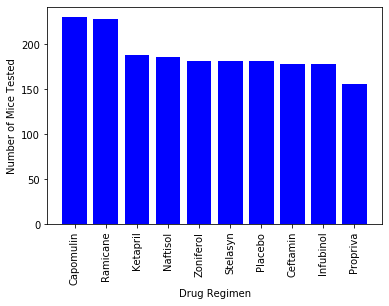

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mice_per_drug.index.values
count = mice_per_drug.values
#Display Bar chart based on the number of mine each drug regimen
plt.bar(drugs, count,color="b", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()


        Total  Percentage of Sex
Sex                             
Female    124          49.799197
Male      125          50.200803


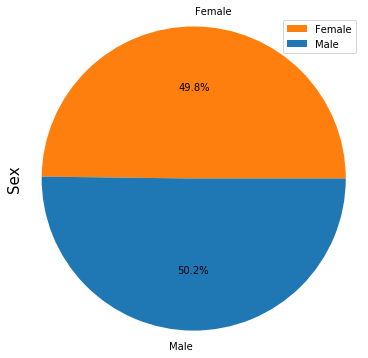

In [16]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas
combine_gender = all_data.groupby(["Mouse ID","Sex"])
combine_gender_df = pd.DataFrame(combine_gender.size())
#Calculate total of gender.
female_vs_male =pd.DataFrame(combine_gender_df.groupby(["Sex"]).count())
female_vs_male.columns = ["Total"]
#Calculate % of each gender. 
female_vs_male["Percentage of Sex"] = (100*(female_vs_male["Total"]/female_vs_male["Total"].sum()))
print(female_vs_male)
#Create the pie chart based upon the values 
colors = ["C1","C0"]
plot_pandas = female_vs_male.plot.pie(y="Total",figsize=(6,6), colors = colors, autopct="%1.1f%%")
plt.ylabel('Sex',fontsize = 15)
#Set equal axis
plt.axis("equal",fontsize = 15)
plt.show()

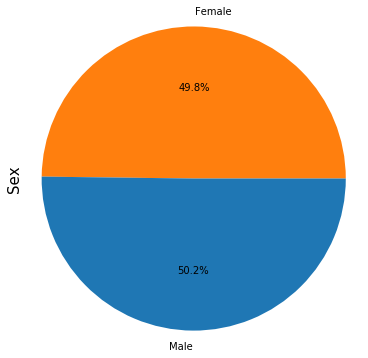

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
values = [49.799197, 50.200803]

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.pie(values,labels=labels, colors=colors, autopct="%1.1f%%")
plt.ylabel('Sex',fontsize = 15)
#Set equal axis
plt.axis("equal",fontsize = 15)
plt.show()

## Quartiles, Outliers and Boxplots

In [115]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = all_data[all_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = treatment_regimens.sort_values(["Timepoint"], ascending=True)
print(treatment_regimens)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
both_dataframe = treatment_regimens.merge(all_data, on = ("Mouse ID", "Timepoint"), how = "left" )
print(both_dataframe)
# Tumor volume at last timepoint
regimes_data_df= treatment_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
regimes_data_df


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
221      q483          0           45.000000                 0     Ceftamin   
220      o287          0           45.000000                 0     Ceftamin   
219      b487          0           45.000000                 0     Ceftamin   
218      p438          0           45.000000                 0     Ceftamin   
...       ...        ...                 ...               ...          ...   
1802     e476         45           62.435404                 1    Infubinol   
1804     a203         45           67.973419                 2    Infubinol   
1806     f345         45           60.918767                 1    Infubinol   
1810     l471         45           67.748662                 1     Ceftamin   
1890     p438         45           61.433892                 1     Ceftamin   

         Sex  Age_months  Weight (g)  
0     Female

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
221,Ceftamin,q483,0,45.000000
220,Ceftamin,o287,0,45.000000
219,Ceftamin,b487,0,45.000000
218,Ceftamin,p438,0,45.000000
...,...,...,...,...
1802,Infubinol,e476,45,62.435404
1804,Infubinol,a203,45,67.973419
1806,Infubinol,f345,45,60.918767
1810,Ceftamin,l471,45,67.748662


In [117]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = treatment_regimens["Drug Regimen"].unique()
print(treatments)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
tumor_count = 0

for t in treatments:
    drug_df = all_data.loc[all_data["Drug Regimen"] == t]
    last_tp = pd.DataFrame(drug_df.groupby("Mouse ID").max()["Timepoint"])
    treatment_df = last_tp.merge(all_data, on=("Mouse ID", "Timepoint"), how ="left")
    tumor_vol_list.append(treatment_df["Tumor Volume (mm3)"])
        
    tumor_vol = treatment_df["Tumor Volume (mm3)"]
    quartiles = tumor_vol.quantile([.25,.5,.75])
    ir1 = quartiles[0.25]
    ir3 = quartiles[0.75]
    iqr = ir3 - ir1
    print(f'IQR for {t}: {iqr}')

    lower_bound = ir1 - (1.5*iqr)
    upper_bound = ir3 + (1.5*iqr)
    print(f'Lower Bound for {t}: {lower_bound}')
    print(f'Upper Bound for {t}: {upper_bound}')
    
    if (tumor_vol.max()) >= upper_bound or (tumor_vol.min()) <= lower_bound:
        tumor_count +=1
    print(f'Outliers for {t}: {tumor_count}')
    tumor_count = 0

['Capomulin' 'Ceftamin' 'Infubinol' 'Ramicane']
IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Outliers for Capomulin: 0
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Outliers for Ceftamin: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Outliers for Infubinol: 1
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Outliers for Ramicane: 0


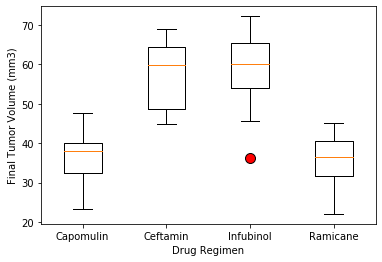

In [118]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
# Put treatments into a list for for loop (and later for plot labels)

flierprops = dict(marker = "o", markerfacecolor = "r", markersize = 10, markeredgecolor = "black")
plt.boxplot(tumor_vol_list, flierprops=flierprops )
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.xticks([1,2,3,4], ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])
plt.show()


## Line and Scatter Plots

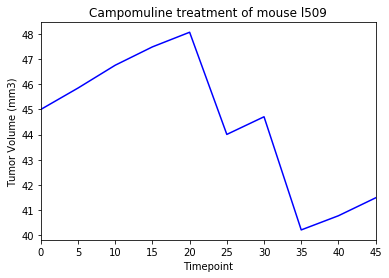

In [165]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = all_data.loc[(all_data["Drug Regimen"] == "Capomulin") & (all_data["Mouse ID"] == "l509") ]
mouse_treated_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
mouse_treated_capomulin_df = capomulin_df.set_index(["Timepoint"])
timepoint = mouse_treated_capomulin_df.index.values
tumor_vol =mouse_treated_capomulin_df.values

#Final plot
line_plot["Tumor Volume (mm3)"].plot(color = "b")
plt.title("Campomuline treatment of mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

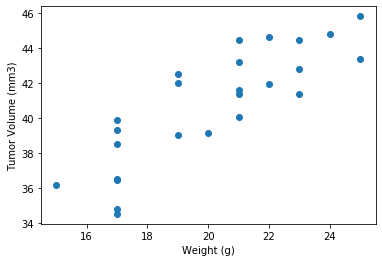

In [168]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = all_data.loc[(all_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})
#graph build and display
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


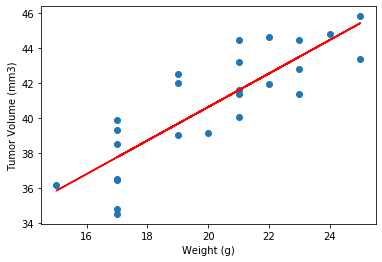

In [182]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr (weight,avg_tumor_vol )
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

## for mouse weight and average observed tumor volume for the entire Capomulin regimen
scatter_plot = all_data.loc[(all_data["Drug Regimen"] == "Capomulin")]
scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()
weight_scatter_plot = scatter_plot_df["Weight (g)"]
volume_scatter_plot = scatter_plot_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = weight_scatter_plot * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#graph build and display
plt.scatter(weight_scatter_plot,volume_scatter_plot )
plt.plot(weight_scatter_plot,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()